<a href="https://colab.research.google.com/github/anushan1989/BikeSharing/blob/main/Bike_sharing_anusha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Reading and Understanding the Data**

In [40]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing the necessary modules
import pandas as pd
import numpy as np

# Read the data from csv file
bike_df = pd.read_csv('/content/day.csv')
bike_df.head(n = 20)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


**Data Quality Checks**

In [41]:
# checking the shape of dataframe
bike_df.shape
(730, 16)
# get the info about columns
bike_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [43]:
# describing the columns of dataframe
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [44]:
# percentage of missing values in each column
round(100*(bike_df.isnull().sum()/len(bike_df)), 2).sort_values(ascending=False)

,0
instant,0.0
dteday,0.0
season,0.0
yr,0.0
mnth,0.0
holiday,0.0
weekday,0.0
workingday,0.0
weathersit,0.0
temp,0.0


In [45]:
round(100*(bike_df.isnull().sum(axis=1)/len(bike_df)), 2).sort_values(ascending=False)

,0
0,0.0
479,0.0
481,0.0
482,0.0
483,0.0
...,...
245,0.0
246,0.0
247,0.0
248,0.0


In [46]:
bike_dummy=bike_df.iloc[:,1:16]
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64 



season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 



yr
0    365
1    365
Name: count, dtype: int64 



mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64 



holiday
0    709
1     21
Name: count, dtype: int64 



weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 



workingday
1    499
0    231
Name: count, dtype: int64 



weathersit
1    463
2    246
3     21
Name: count, dtype: int64 



temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: count, Length: 498, dtype: int64 



atemp
32.7

**Visualizing Continuous Variables**

In [47]:
# Checking for duplicate values

bike_dup_copy = bike_df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup_copy.drop_duplicates(subset=None, inplace=True)
bike_dup_copy.shape

(730, 16)

In [48]:
bike_df.shape

(730, 16)

In [49]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [50]:
bike_df_new = bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]
bike_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


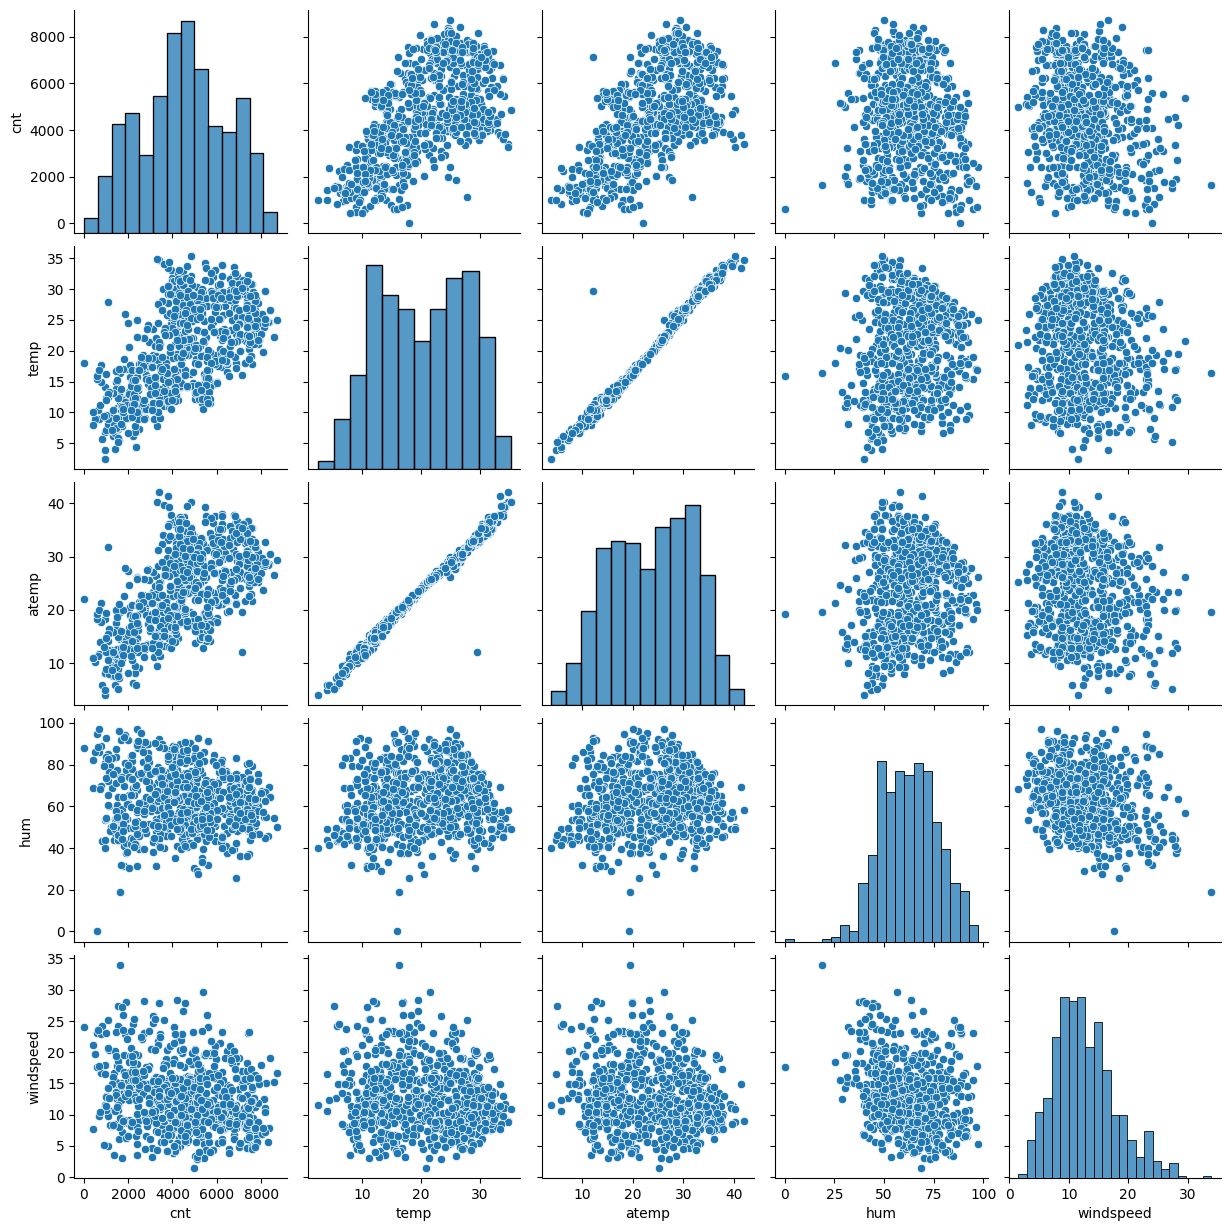

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analysing/visualizing the numerical columns
#Visualising Numeric Variables : Using a pairplot

sns.pairplot(data=bike_df_new, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()



The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

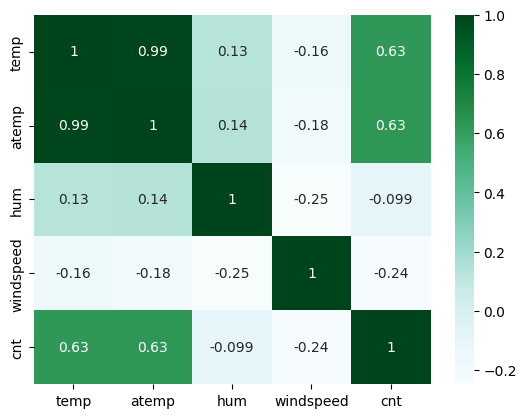

In [53]:
# Checking continuous variables relationship with each other
sns.heatmap(bike_df_new[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

The above correlation plot tells us that there is a high correlation between 'temp','atemp' vs 'cnt'

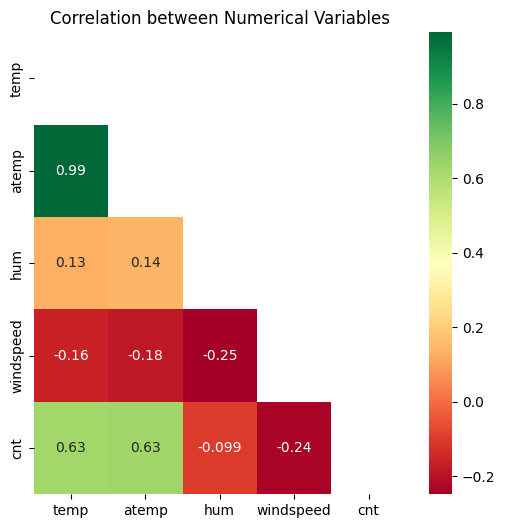

In [16]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(bike_df_new[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(bike_df_new[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables



Insights:

By visualising the numeric variables, we can conclude that a linear model can be considered in this case because there are atleast some independent variables like atemp , temp etc. that show a positive correlation with the target variable cnt .

Visualising Categorical Variables : Using a boxplot


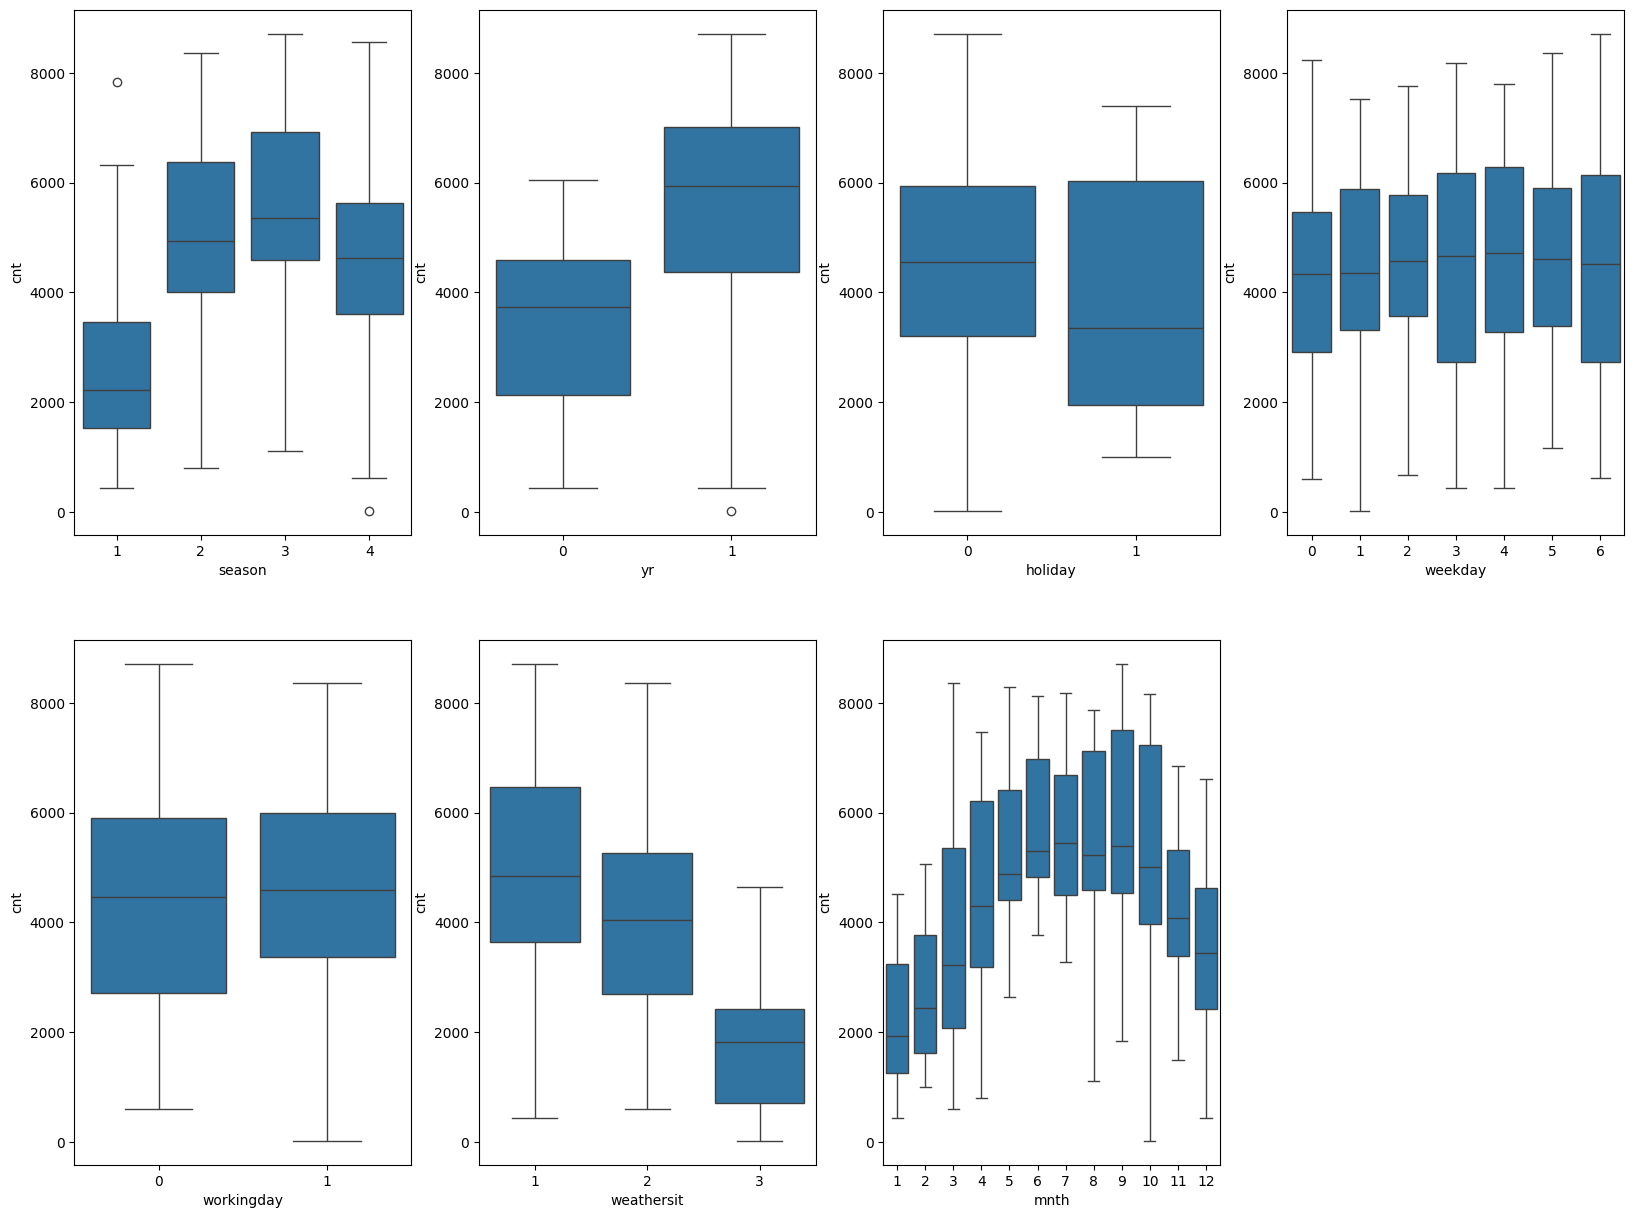

In [54]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df_new)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df_new)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df_new)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df_new)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df_new)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df_new)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df_new)
plt.show()



Insights:

    The graph clearly shows the qualitative distributions of the data, now if the model suggests the important predictors, using these graphs we can be more confident about the predictions of the model.

    For the variable season, we can clearly see that the category 3 : Fall, has the highest median, which shows that the demand was high during this season. It is least for 1: spring.

    The year 2019 had a higher count of users as compared to the year 2018.

    The count of rentals is almost even throughout the week.

    There are no users when there is heavy rain/ snow indicating that this weather is quite adverse. Highest count was seen when the weather situation was Clear, Partly Cloudy.

    The number of rentals peaked in September, whereas they peaked in December. This observation is consistent with the observations made regarding the weather. As a result of the typical substantial snowfall in December, rentals may have declined.

    The count of users is less during the holidays.

    From the "Workingday" boxplot we can see those maximum bookings happening between 4000 and 6000, that is the median count of users is constant almost throughout the week. There is not much of difference in booking whether its working day or not.

Step 3: Data Preparation

Mapping the categorical values to their respective categorical string values (reference data dictionary)


In [18]:
# Encoding/mapping the season column
bike_df_new.season = bike_df_new.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})


In [19]:
# Encoding/mapping the month column
bike_df_new.mnth = bike_df_new.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})


In [20]:
bike_df_new.weekday =bike_df_new.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})


In [21]:
# Encoding/mapping the weathersit column
bike_df_new.weathersit = bike_df_new.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [22]:
# check the head of the dataset
bike_df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [55]:
# Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable - 'dummy'
dummy = bike_df_new[['season','mnth','weekday','weathersit']]

dummy = pd.get_dummies(dummy,drop_first=True)
bike_df_new = pd.concat([dummy,bike_df_new],axis = 1)
bike_df_new.drop(['season', 'weathersit', 'weekday', 'mnth'],axis=1,inplace=True)
bike_df_new.head()



,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [56]:
bike_df_new.shape
(730, 30)
bike_df_new.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 45.8 KB


In [58]:
from sklearn.model_selection import train_test_split
#Loading the data

train, test = train_test_split(bike_df_new, train_size = 0.7, random_state = 100)


print(train.shape)
print(test.shape)

(510, 8)
(220, 8)


In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']
train[num_vars] = scaler.fit_transform(train[num_vars])
train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [60]:
train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


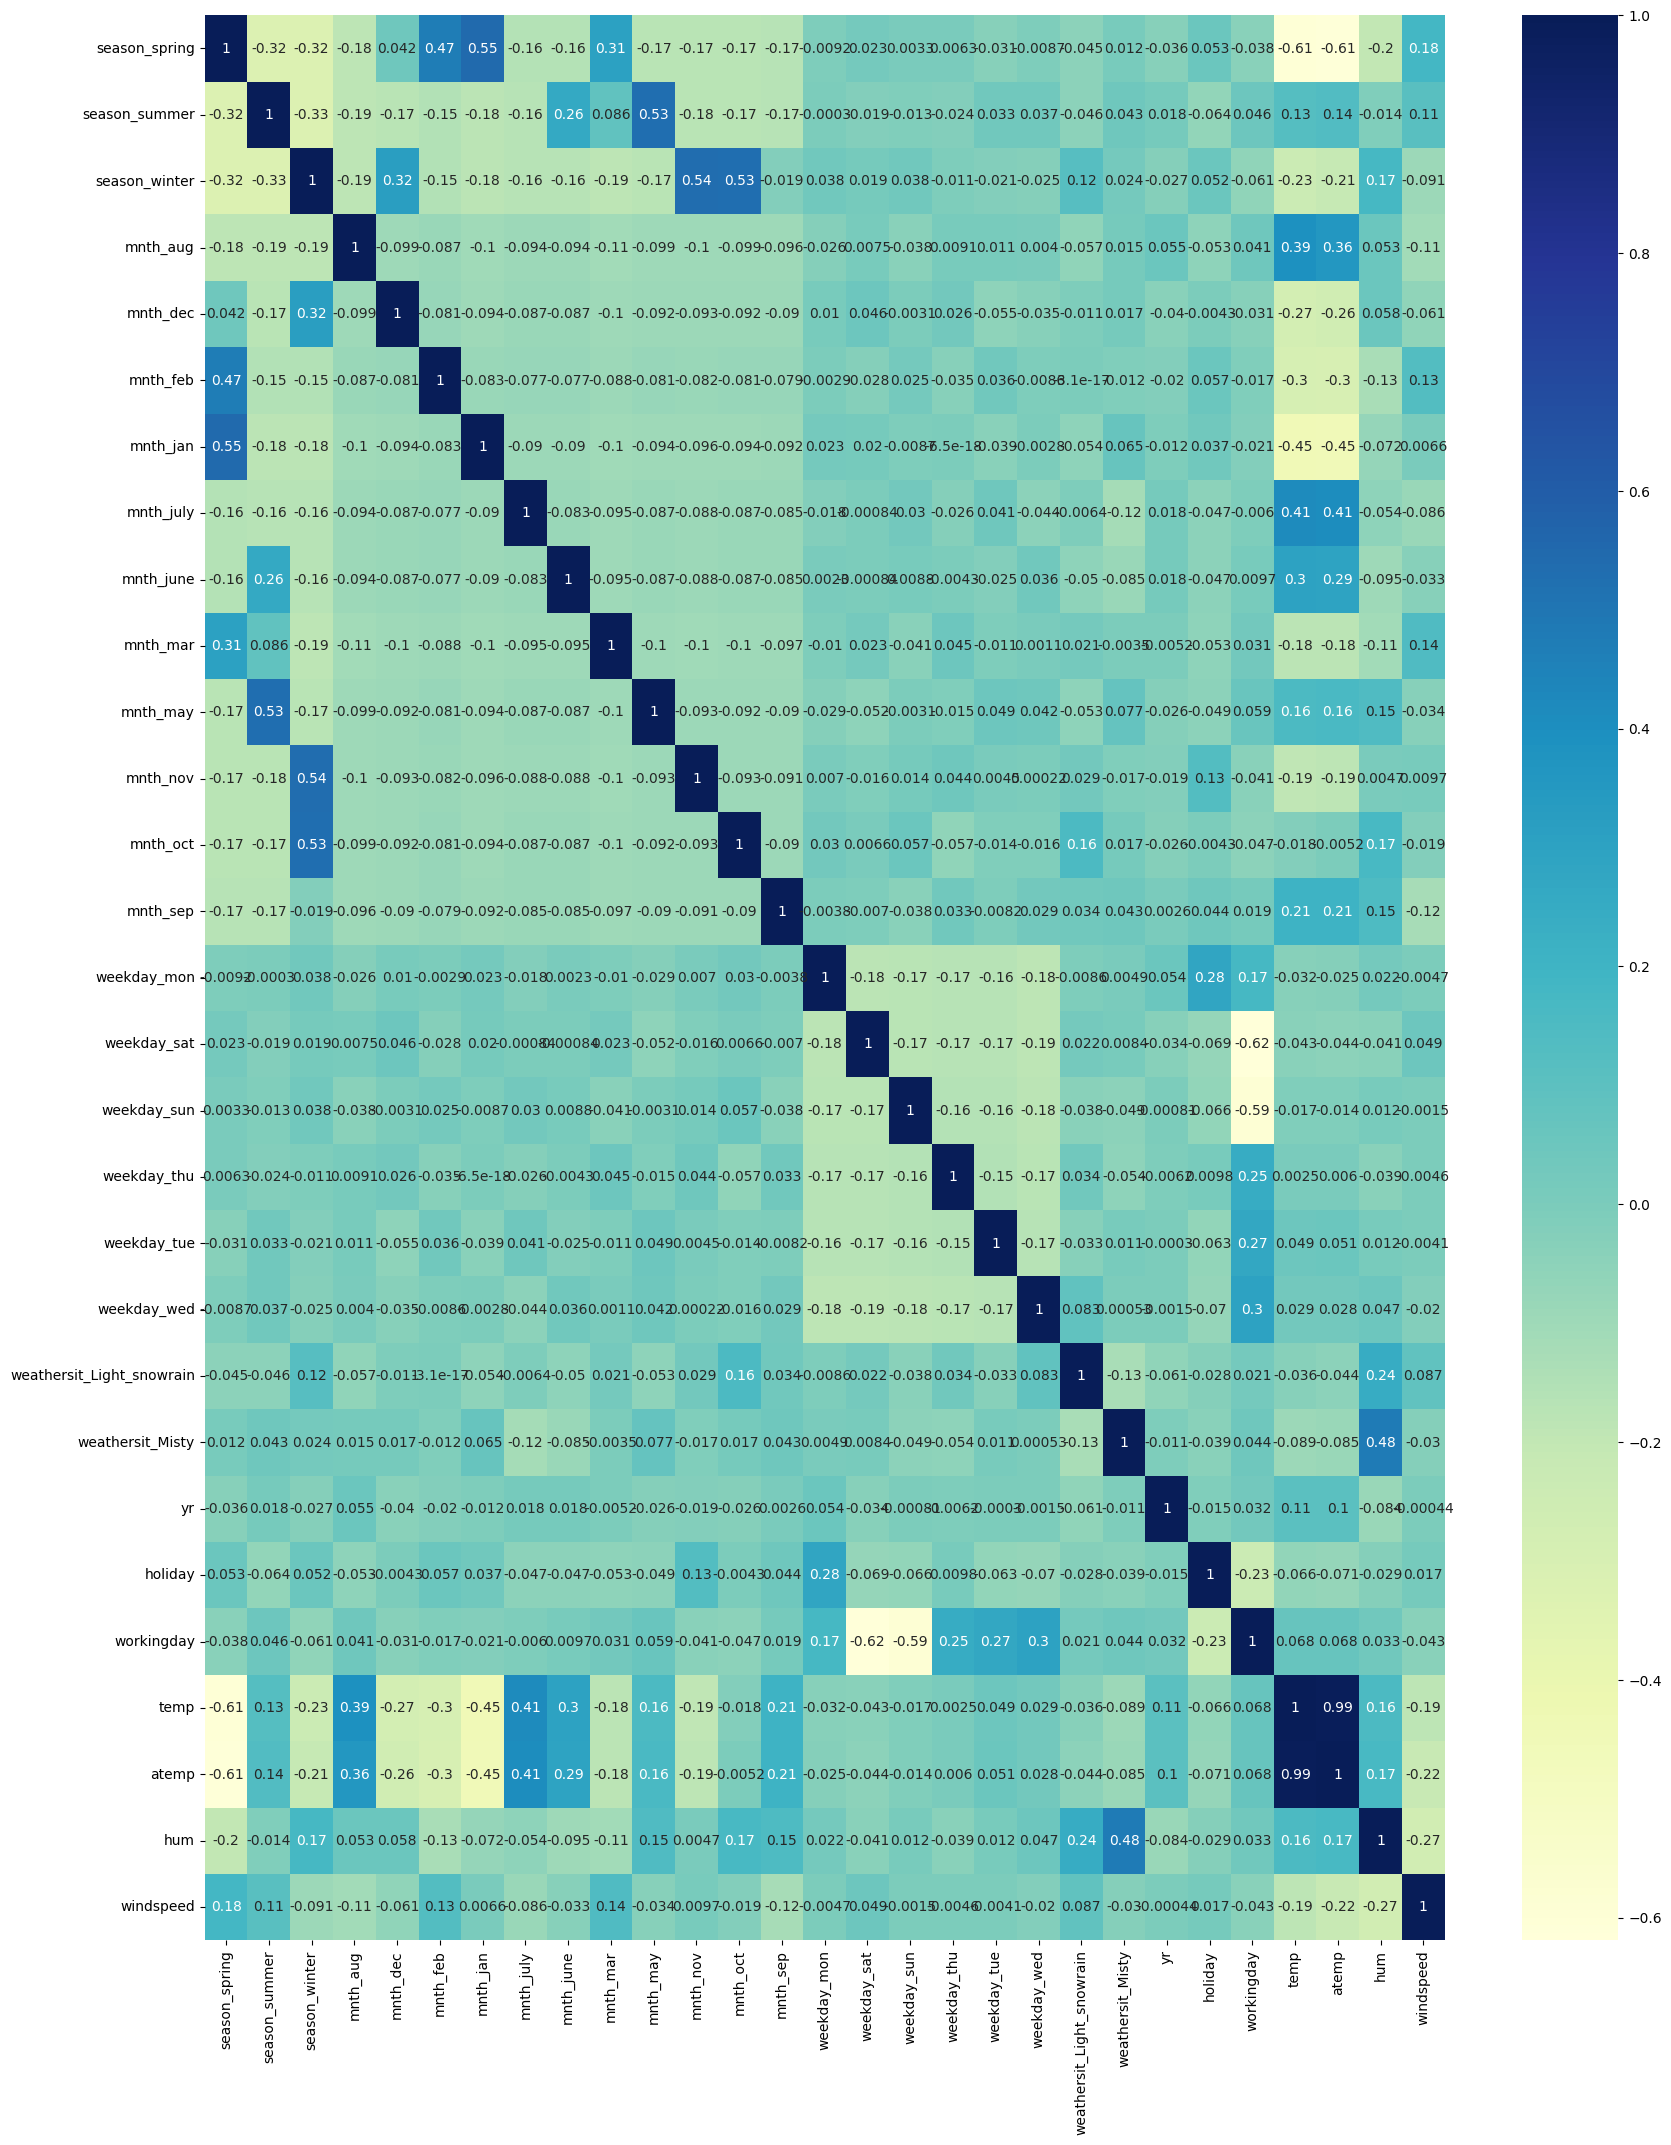

In [37]:
plt.figure(figsize = (20, 25))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

**BUILDING A LINEAR MODEL**

Dividing into X and Y sets for the model building

In [61]:
#check if cnt column exists, if it does we remove it.
if 'cnt' in train.columns:
  y_train = train.pop('cnt')
  X_train = train
  print(y_train.shape)
else:
  print("cnt column does not exist")

(510,)


RFE( Recursive feature elimination): We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [63]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [64]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed'], dtype='object')

In [65]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [66]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


**Building Linear Model using STATS MODEL**

**Model - 1**

**VIF Check **

In [67]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,342.02
3,temp,331.51
5,hum,9.24
6,windspeed,3.54
2,workingday,3.13
0,yr,2.01
1,holiday,1.08


In [75]:
import statsmodels.api as sm
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)
# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()
# Check the parameters obtained

lr1.params


,0
const,0.310840
yr,0.230918
holiday,-0.062884
workingday,0.011187
temp,0.208728
atemp,0.391742
hum,-0.245575
windspeed,-0.230730


 Model - 2

    Removing the variable 'atemp' based on its Very High 'VIF' value.
    Even though the VIF of atemp is second highest, we decided to drop 'atemp' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [88]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [89]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,8.75
3,temp,6.41
5,windspeed,3.45
2,workingday,3.13
0,yr,2.01
1,holiday,1.07


In [90]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.params

,0
const,0.318767
yr,0.230837
holiday,-0.065575
workingday,0.010924
temp,0.570731
hum,-0.240443
windspeed,-0.244774


In [91]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     235.5
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.41e-142
Time:                        08:33:57   Log-Likelihood:                 379.97
No. Observations:                 510   AIC:                            -745.9
Df Residuals:                     503   BIC:                            -716.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3188      0.032      9.880      0.0


Model - 3

    Removing the variable 'hum' based on its Very High 'VIF' value.



In [92]:
X_train_new = X_train_new.drop(["hum"], axis = 1)



In [93]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,3.79
4,windspeed,2.92
2,workingday,2.82
0,yr,1.99
1,holiday,1.06


In [94]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Check the parameters obtained

lr3.params



,0
const,0.153161
yr,0.237676
holiday,-0.062148
workingday,0.009911
temp,0.552391
windspeed,-0.194341


In [95]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     253.3
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          5.61e-135
Time:                        08:35:07   Log-Likelihood:                 359.31
No. Observations:                 510   AIC:                            -706.6
Df Residuals:                     504   BIC:                            -681.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1532      0.021      7.408      0.0


Model - 4

    Removing the variable windspeed based on its Very High 'VIF' value.
    Even though the VIF of windspeed is second highest, we decided to drop 'windspeed' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [96]:
X_train_new = X_train_new.drop(['windspeed'], axis = 1)

In [97]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,3.16
2,workingday,2.61
0,yr,1.94
1,holiday,1.04


In [98]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Check the parameters obtained

lr4.params



,0
const,0.075282
yr,0.236305
holiday,-0.061743
workingday,0.012096
temp,0.579792


In [102]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     287.0
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.60e-128
Time:                        08:37:40   Log-Likelihood:                 341.30
No. Observations:                 510   AIC:                            -672.6
Df Residuals:                     505   BIC:                            -651.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0753      0.017      4.485      0.0


Model - 5

    All Variables VIF values are well below 5. The 'mnth_Jul' variable having its High P-value 0.048 which is close to 0.05 hence for safety purpose I drop this variable.



In [107]:
X_train_new = X_train_new.drop(["mnth_Jul"], axis = 1)

KeyError: "['mnth_Jul'] not found in axis"

In [108]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,3.16
2,workingday,2.61
0,yr,1.94
1,holiday,1.04


In [110]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Check the parameters obtained

lr5.params



,0
const,0.075282
yr,0.236305
holiday,-0.061743
workingday,0.012096
temp,0.579792


In [111]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     287.0
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.60e-128
Time:                        08:39:41   Log-Likelihood:                 341.30
No. Observations:                 510   AIC:                            -672.6
Df Residuals:                     505   BIC:                            -651.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0753      0.017      4.485      0.0



    This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

Final Model Interpretation

Hypothesis Testing:
Hypothesis testing states that:

H0:B1=B2=...=Bn=0
H1: at least one Bi!=0

lr6 model coefficient values

const = 0.248891
yr = 0.232965
temp = 0.375922
season_Spring = -0.087867
season_Winter = 0.084976
mnth_Dec = -0.080011
mnth_Feb = -0.057742
mnth_Jan = -0.080914
mnth_Nov = -0.082132
mnth_Sep = 0.065011
weathersit_Light_Snow_Rain = -0.333164
weathersit_Mist_Cloudy =-0.072447

    From the lr5 model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS

F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

    F-statistic: 202.8
    Prob (F-statistic): 5.79e-176
    The F-Statistics value are 202.8 (which is greater than 1) and the p-value of all the variables are '0.000' Except 'mnth_Feb' = 0.011 which is also well below 0.05 it states that the overall model is significant.

The equation of best fitted surface based on model lr6:

cnt = 0.248891 + (yr × 0.232965) + (temp × 0.375922) - (season_Spring × 0.087867) + (season_Winter × 0.084976) - (mnth_Dec × 0.080011) - (mnth_Feb × 0.057742) - (mnth_Jan × 0.080914) - (mnth_Nov × 0.082132) + (mnth_Sep × 0.065011) − (weathersit_Light_Snow_Rain × 0.333164) − (weathersit_Mist_Cloudy × 0.072447)
Interpretation of Coefficients:

This is similar to equation: Y = B0 + B1x1 + B2X2 ...Bn*Xn
where:

    If Positive sign: A coefficients value of (B1,B2,B3...Bn) indicated that a unit increase in Independent variable(X1,X2,X3...Xn), increases the bike hire numbers by (B1,B2,B3...Bn) units.

    If Negative sign: A coefficients value of (B1,B2,B3...Bn) indicated that a unit increase in Independent variable(X1,X2,X3...Xn), decreases the bike hire numbers by (B1,B2,B3...Bn) units.

    const: The Constant value of ‘0.248891’ indicated that, in the absence of all other predictor variables
    (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.248891 units.

ASSUMPTIONS

Error terms are normally distributed with mean zero (not X, Y)

    Residual Analysis Of Training Data



Text(0.5, 0, 'Errors')

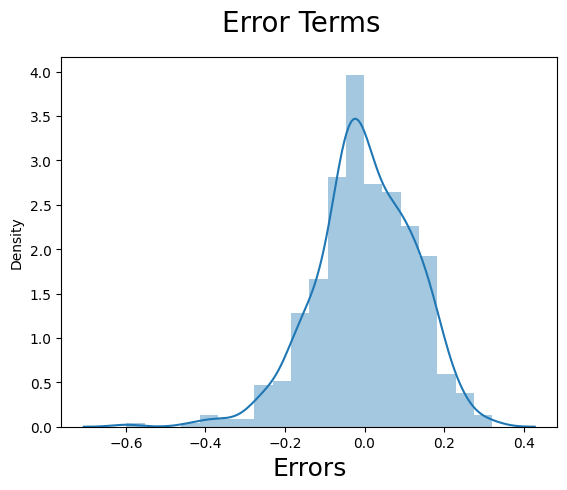

In [112]:
y_train_pred = lr5.predict(X_train_lm5)

res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label



From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

In [116]:
#There is a linear relationship between X and Y
bike_new=bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

NameError: name 'bike_new' is not defined

Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.


There is No Multicollinearity between the predictor variables


In [117]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,3.16
2,workingday,2.61
0,yr,1.94
1,holiday,1.04


From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5


MAKING PREDICTION USING FINAL MODEL

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr5)

Applying the scaling on the test sets


In [118]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform,
# as we want to use the metrics that the model learned from the training data to be applied on the test data.
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

NameError: name 'df_test' is not defined

In [119]:
df_test.head()

NameError: name 'df_test' is not defined

In [120]:
df_test.describe()

NameError: name 'df_test' is not defined

In [122]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

NameError: name 'df_test' is not defined

In [123]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)
X_test_lm5.info()

NameError: name 'X_test' is not defined

In [124]:
# Making predictions using the final model (lr6)

y_pred = lr5.predict(X_test_lm5)

NameError: name 'X_test_lm5' is not defined

In [125]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

NameError: name 'y_test' is not defined

<Figure size 640x480 with 0 Axes>

R^2 Value for TEST

In [126]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
r2_score(y_test, y_pred)

NameError: name 'y_test' is not defined

In [127]:
# We already have the value of R^2 (calculated in above step)

r2=0.8224454904426144
# Get the shape of X_test
X_test.shape

NameError: name 'X_test' is not defined

In [128]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

NameError: name 'X_test' is not defined



    Train R^2 :0.817
    Train Adjusted R^2 :0.813
    Test R^2 :0.822
    Test Adjusted R^2 :0.813
    This seems to be a really good model that can very well 'Generalize' various datasets.



In [129]:
r2_train=0.817
r2_test=0.822

# Checking the difference between the test-train r2 score
print('Difference in r2 Score(%)',(-r2_train + r2_test)*100)



Difference in r2 Score(%) 0.5000000000000004


In [132]:
Train_Adjusted_R2 = 0.813
Test_Adjusted_R2 = 0.813

# Checking the difference between the test-train Adjusted_R2 score
print('Difference in Adjusted_R2 Score(%)',(Train_Adjusted_R2-Test_Adjusted_R2)*100)



Difference in Adjusted_R2 Score(%) 0.0



FINAL REPORT

As per our final Model, the top 3 predictor variables that influences the bike booking are:

    Temperature (temp) - A coefficient value of ‘0.375922’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.375922 units.

    Weather Situation 3 (weathersit_3)(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered) - A coefficient value of ‘-0.333164’ indicated that, w.r.t Weathersit_3, a unit increase in Weathersit_3 variable decreases the bike hire numbers by 0.333164 units.

    Year (yr) - A coefficient value of ‘0.232965’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.232965 units.

So, it's suggested to consider these variables utmost importance while planning, to achieve maximum Booking